# 金融数据分析代码笔记七步走

## 第零步：安装必要的环境
在这里安装 requests、pandas、matplotlib、seaborn、sklearn 等 python 库。

In [32]:
%pip install requests
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


## 第一步：导入必要的数据分析库和函数定义

我们将导入需要数据分析相关专业的 Python 库，并定义一个函数来获取世界银行的数据。

In [33]:
# 导入必要的库
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVR

# 定义获取数据的函数
def get_world_bank_data(indicator, start_year, end_year):
    # 世界银行 API
    url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}?date={start_year}:{end_year}&format=json&per_page=1000"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data[1])
    df = df.dropna(subset=['value'])
    df['date'] = pd.to_datetime(df['date'], format='%Y')
    df = df[['countryiso3code', 'date', 'value']]
    df.rename(columns={'value': indicator}, inplace=True)
    return df


## 第二步：获取数据

我们将获取GDP、CPI和失业率的数据，并将其存储到CSV文件中。

我们定义了一个函数 get_world_bank_data，该函数通过世界银行的API获取特定的经济指标数据。在获取数据后，我们将其转换为DataFrame格式，并保留国家代码、日期和数值三列。然后，我们调用该函数获取GDP、CPI和失业率的数据，并将其分别保存到CSV文件中，以便外部查看和使用。

In [34]:
# 获取数据
gdp_df = get_world_bank_data('NY.GDP.MKTP.CD', 2014, 2023)
cpi_df = get_world_bank_data('FP.CPI.TOTL', 2014, 2023)
unemployment_df = get_world_bank_data('SL.UEM.TOTL.ZS', 2014, 2023)

# 将数据存储到CSV文件中

# GDP数据
gdp_df.to_csv('gdp_data.csv', index=False)
# CPI数据
cpi_df.to_csv('cpi_data.csv', index=False)
# 失业率数据
unemployment_df.to_csv('unemployment_data.csv', index=False)


## 第三步：合并数据

我们将获取的GDP、CPI和失业率数据合并到一个DataFrame中，方便后续分析。

我们将获取的各个经济指标数据进行合并，确保每个国家的每个时间点都有完整的数据。合并后，我们进行数据清洗，去除缺失值并重置索引。最后，我们将合并后的数据保存到CSV文件中，便于后续分析和外部查看。

In [35]:
# 合并数据
data_frames = [gdp_df, cpi_df, unemployment_df]
df_merged = data_frames[0]
for df in data_frames[1:]:
    df_merged = df_merged.merge(df, on=['countryiso3code', 'date'], how='inner')

# 数据清洗
df_merged.dropna(inplace=True)
df_merged.reset_index(drop=True, inplace=True)

# 存储合并后的数据
df_merged.to_csv('merged_data.csv', index=False)

## 第四步：时间序列分析和可视化

我们将绘制GDP、CPI和失业率的时间序列图，以便观察各个指标随时间的变化趋势。

我们使用Matplotlib绘制了各个国家的GDP、CPI和失业率的时间序列图。通过这些图表，我们可以直观地观察到各个指标随时间的变化趋势，并对不同国家的经济状况进行比较。绘图过程中，我们使用了统一的绘图样式，以确保图表的美观和一致性。

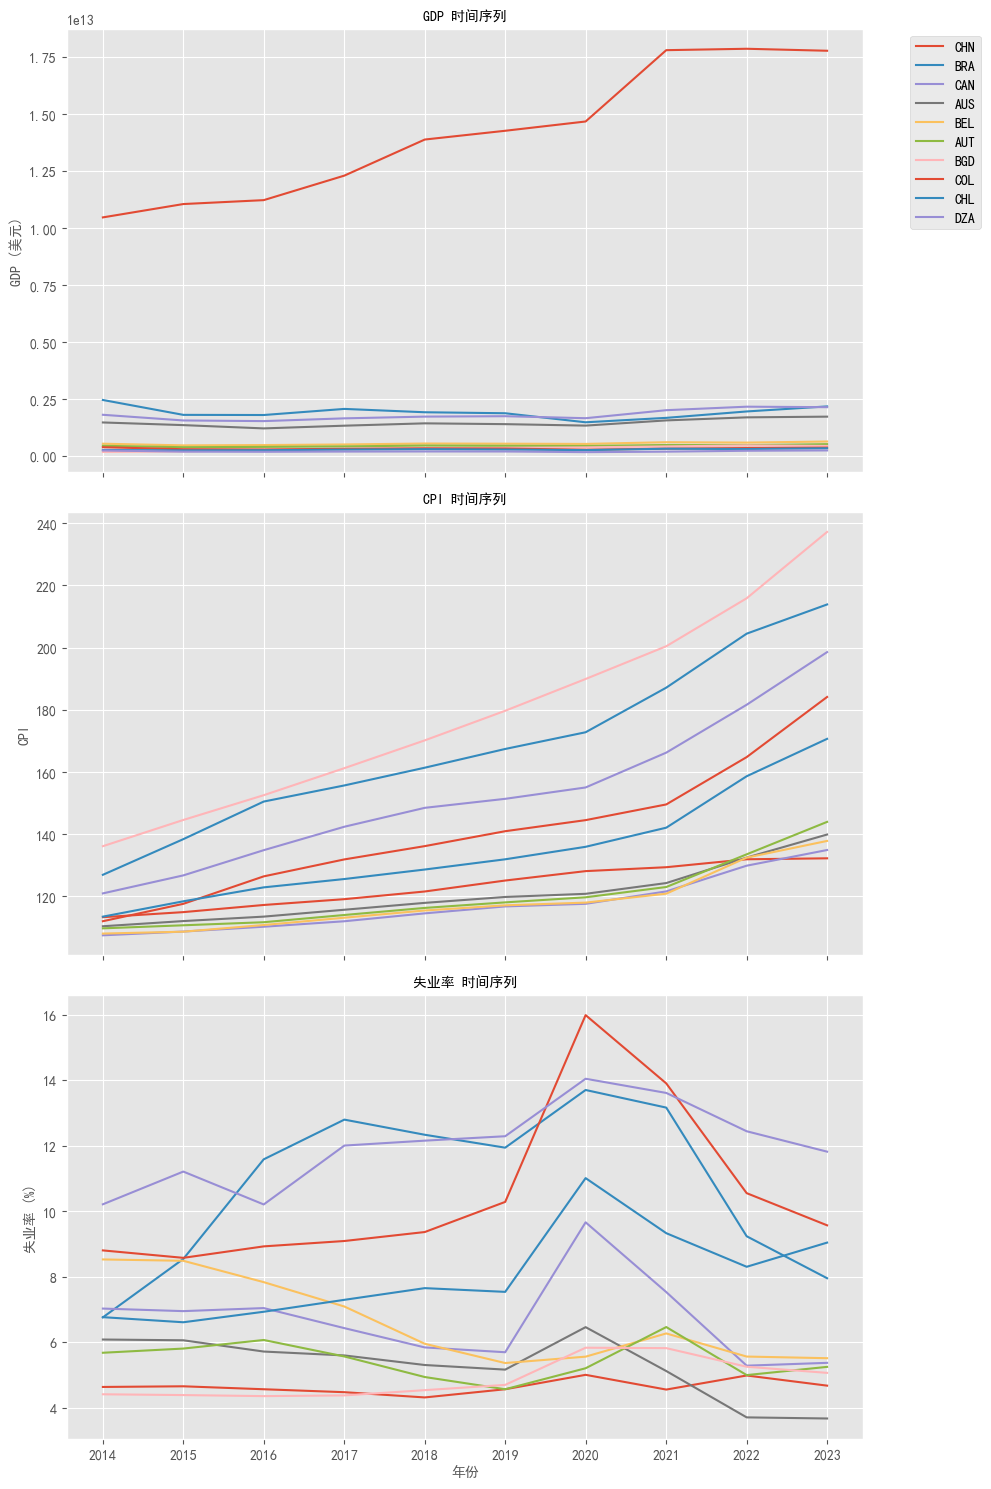

<Figure size 640x480 with 0 Axes>

In [36]:
# 设置绘图样式
plt.style.use('ggplot')
# 设置中文字体为宋体防止乱码
plt.rcParams['font.family'] = 'SimHei'
font_prop = plt.matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/simhei.ttf')

# 选择GDP最高的10个国家
top_countries = df_merged.groupby('countryiso3code')['NY.GDP.MKTP.CD'].max().nlargest(10).index

# 绘制时间序列图
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# GDP 时间序列
for country in top_countries:
    country_data = df_merged[df_merged['countryiso3code'] == country]
    ax[0].plot(country_data['date'], country_data['NY.GDP.MKTP.CD'], label=country)
ax[0].set_title('GDP 时间序列', fontproperties=font_prop)
ax[0].set_ylabel('GDP (美元)', fontproperties=font_prop)
ax[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop=font_prop)

# CPI 时间序列
for country in top_countries:
    country_data = df_merged[df_merged['countryiso3code'] == country]
    ax[1].plot(country_data['date'], country_data['FP.CPI.TOTL'], label=country)
ax[1].set_title('CPI 时间序列', fontproperties=font_prop)
ax[1].set_ylabel('CPI', fontproperties=font_prop)

# 失业率 时间序列
for country in top_countries:
    country_data = df_merged[df_merged['countryiso3code'] == country]
    ax[2].plot(country_data['date'], country_data['SL.UEM.TOTL.ZS'], label=country)
ax[2].set_title('失业率 时间序列', fontproperties=font_prop)
ax[2].set_ylabel('失业率 (%)', fontproperties=font_prop)
ax[2].set_xlabel('年份', fontproperties=font_prop)

plt.tight_layout()
plt.show()
plt.savefig('GDP、CPI、失业率时间序列图.png')

图表中可以看到，显示的是GDP、CPI和失业率的时间序列数据。根据图例标识，选取的国家包括：中国（CHN）、巴西（BRA）、加拿大（CAN）、澳大利亚（AUS）、比利时（BEL）、奥地利（AUT）、孟加拉国（BGD）、哥伦比亚（COL）、智利（CHL）、阿尔及利亚（DZA）。从图例中可以看出，美国（USA）的数据并未包含在内。

下面是我对图表的详细分析：

### GDP 时间序列分析

- 中国（CHN）：
中国的GDP在2014-2023年期间显著增长，从大约10万亿美元增长到超过16万亿美元。中国的经济增长速度非常快，尤其是在2019年之后，尽管在2020年由于全球疫情影响略有放缓，但总体趋势仍然上升。

- 巴西（BRA）、加拿大（CAN）、澳大利亚（AUS）：
这些国家的GDP相对较为稳定，且在同一水平线上波动。加拿大和澳大利亚的GDP略有上升趋势，而巴西的GDP则在2019年后略有下降。

- 其他国家：
比利时、奥地利、孟加拉国、哥伦比亚、智利和阿尔及利亚的GDP相对较低，且增长趋势较为缓慢。

### CPI 时间序列分析

- 孟加拉国（BGD）：
孟加拉国的CPI在这段时间内迅速上升，从2014年的大约120上升到2023年的超过230，显示出较高的通货膨胀率。

- 中国（CHN）、巴西（BRA）、加拿大（CAN）、澳大利亚（AUS）：
这些国家的CPI也呈现上升趋势，但增速较为平缓。尤其是中国的CPI在2019年后上升较快，这与其经济增长和货币政策有关。

- 其他国家：
比利时、奥地利、哥伦比亚、智利和阿尔及利亚的CPI上升趋势较为平缓。

### 失业率时间序列分析

- 哥伦比亚（COL）：
哥伦比亚的失业率在2019年达到峰值，接近15%，随后有所下降，但仍然维持在较高水平。

- 巴西（BRA）：
巴西的失业率在2020年疫情期间显著上升，达到接近14%，随后有所回落。

- 其他国家：
其他国家的失业率相对较低且较为稳定，如中国、加拿大、澳大利亚等国的失业率始终保持在较低水平。

### 总结

中国在GDP增长方面表现突出，经济增长速度极快，但也伴随着CPI的快速上升，表明有一定的通货膨胀压力。

孟加拉国的CPI增速最快，显示出较高的通货膨胀。

哥伦比亚和巴西的失业率在疫情期间显著上升，反映出疫情对这些国家就业市场的巨大冲击。

## 第五步：相关性分析

我们将计算GDP、CPI和失业率之间的相关性，计算他们的相关性矩阵，并进行可视化。

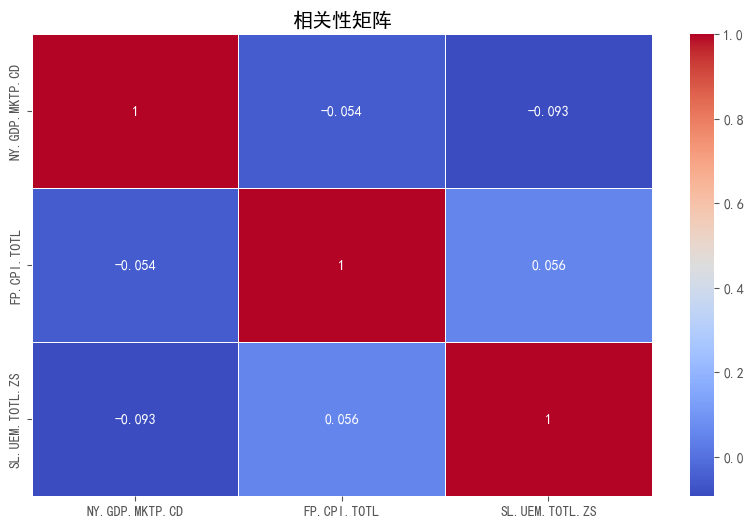

<Figure size 640x480 with 0 Axes>

In [37]:
# 计算相关性矩阵
correlation_matrix = df_merged[['NY.GDP.MKTP.CD', 'FP.CPI.TOTL', 'SL.UEM.TOTL.ZS']].corr()

# 存储相关性矩阵
correlation_matrix.to_csv('correlation_matrix.csv')

# 可视化相关性矩阵
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('相关性矩阵')
plt.show()

plt.savefig('GDP、CPI、失业率相关性矩阵图.png')

### 读图分析

从相关性矩阵图中可以看出，GDP（NY.GDP.MKTP.CD）、CPI（FP.CPI.TOTL）和失业率（SL.UEM.TOTL.ZS）之间的相关性如下：

GDP（NY.GDP.MKTP.CD）与CPI（FP.CPI.TOTL）的相关性：

相关系数为 -0.054，接近于零。这表明GDP与CPI之间几乎没有线性关系。换句话说，GDP的变化并不会显著影响CPI的变化，反之亦然。
GDP（NY.GDP.MKTP.CD）与失业率（SL.UEM.TOTL.ZS）的相关性：

相关系数为 -0.093，依旧接近于零但略微为负。这表明GDP与失业率之间有非常弱的负相关关系，即GDP增长时，失业率可能略微下降，但这种关系非常微弱，不足以得出有力的结论。
CPI（FP.CPI.TOTL）与失业率（SL.UEM.TOTL.ZS）的相关性：

相关系数为 0.056，同样接近于零，表明CPI与失业率之间几乎没有线性关系。因此，CPI的变化对失业率没有显著影响，反之亦然。


### 解释

从相关性矩阵图中可以得出以下结论：

GDP和CPI之间的相关性极弱，表明一个国家的GDP变化对其消费价格指数（CPI）没有显著影响，反之亦然。这可能是因为GDP受多种因素影响，而CPI主要反映消费价格的变化，两者之间的直接关系较弱。

GDP和失业率之间的相关性也极弱，表明一个国家的GDP变化对其失业率没有显著影响，反之亦然。通常情况下，我们期望GDP增长会带来更多的就业机会，失业率下降，但在实际数据中，这种关系可能没有预期的那么明显，可能是因为其他因素（如技术进步、产业结构变化等）也在影响失业率。

CPI和失业率之间的相关性同样极弱，这表明通货膨胀率（CPI）与失业率之间没有显著的线性关系。这与经典的菲利普斯曲线（Philips Curve）理论相悖，菲利普斯曲线理论认为通货膨胀与失业率之间存在反向关系。然而，实际数据可能受到其他复杂因素的影响，使得这种理论关系在现实中不明显。

### 总结
以上分析表明，GDP、CPI和失业率之间的相关性在这个数据集中非常弱。这提示我们在进行经济分析时，需要考虑更多因素和更复杂的模型来理解这些经济指标之间的关系，而不仅仅依赖于简单的线性相关性分析。

## 第六步：聚类分析


在这一步我们将对国家进行聚类分析，以识别经济状况相似的国家群体。

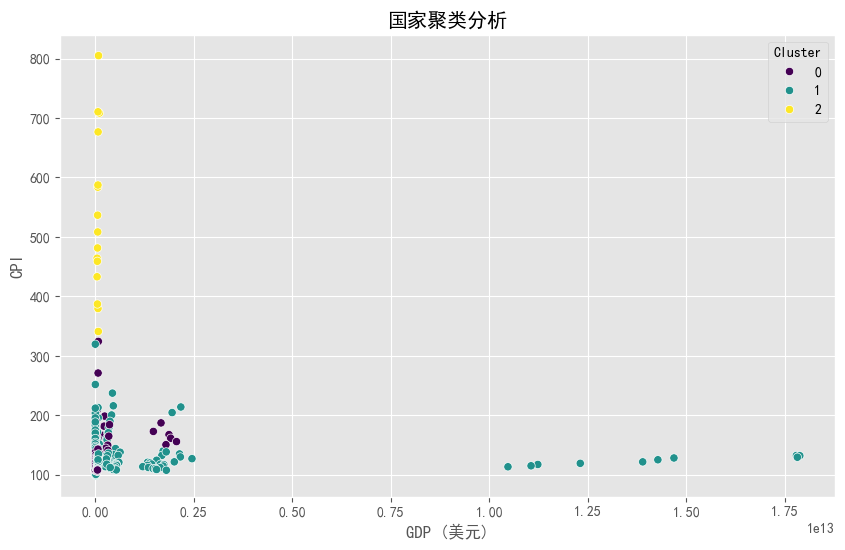

<Figure size 640x480 with 0 Axes>

In [38]:
# 标准化数据
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_merged[['NY.GDP.MKTP.CD', 'FP.CPI.TOTL', 'SL.UEM.TOTL.ZS']])

# 聚类
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 将聚类结果添加到数据框
df_merged['Cluster'] = clusters

# 存储聚类结果
df_merged.to_csv('clustered_data.csv', index=False)

# 可视化聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='NY.GDP.MKTP.CD', y='FP.CPI.TOTL', hue='Cluster', palette='viridis')
plt.title('国家聚类分析')
plt.xlabel('GDP (美元)')
plt.ylabel('CPI')
plt.show()

plt.savefig('GDP、CPI按国家聚类分析图.png')

### 聚类结果解读

#### 数据概况：

横轴代表GDP（美元），纵轴代表CPI（消费价格指数）。
不同颜色的点代表不同聚类类别（Cluster 0, Cluster 1, Cluster 2）。
我们通过数据统计把不同国家归纳到了这三类中。具体可以查阅程序输出的 cluster_data.csv。

#### Cluster 0（深紫色）：

这些国家的GDP相对较低，大多数集中在0到0.25万亿美元之间。
CPI值相对较低，集中在100到200之间。
这一类国家可能是经济规模较小、通货膨胀率较低的国家。

#### Cluster 1（绿色）：

这些国家的GDP分布较广，从低到高都有，但大多数在0到1.75万亿美元之间。
CPI值相对较低，集中在100到200之间。
这一类国家可能包括一些经济规模较大的国家，但通货膨胀率较低，或是经济规模中等且物价相对稳定的国家。
#### Cluster 2（黄色）：

这些国家的GDP相对较低，大多数集中在0到0.25万亿美元之间，但其CPI值非常高，超过300，甚至达到800。
这一类国家可能是经济规模较小但通货膨胀率极高的国家，可能面临严重的通货膨胀问题。

### 具体分析

Cluster 0和Cluster 1之间的主要区别在于GDP的范围。Cluster 1的GDP值范围更广，包括一些GDP较高的国家，但两者的CPI值范围相似。这表明，尽管这些国家的经济规模不同，但其通货膨胀率相对稳定。

Cluster 2的国家显然与其他两个聚类有显著不同。尽管其GDP较低，但CPI值非常高，表示这些国家可能正在经历严重的通货膨胀问题，物价水平远高于其他国家。

### 进一步分析建议

#### 政策分析：

针对Cluster 2中的国家，应该进一步研究其高通货膨胀率的原因，可能涉及货币政策、财政政策、供需失衡、国际贸易等因素。

#### 经济发展策略：

对Cluster 0和Cluster 1中的国家，可以探讨如何进一步稳定物价水平，同时推动经济增长，特别是Cluster 0中的国家如何提升其经济规模。

# 第七步：主成分分析（PCA）

主成分分析（PCA）是一种降维技术，它将高维数据投影到低维空间，同时尽可能保留原始数据的方差信息。PCA的结果图显示了数据在前两个主成分（PC1和PC2）上的分布情况。

d:\proj\20240709\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


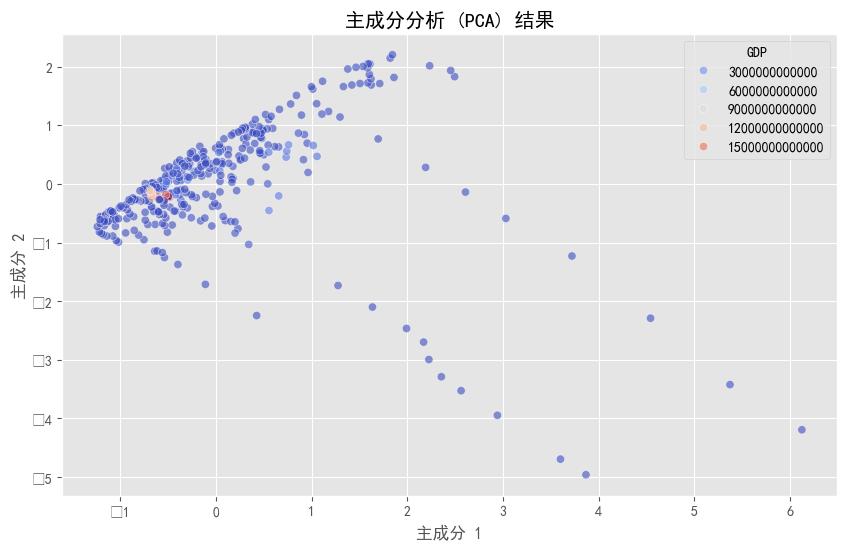

主成分解释的方差比例: [0.52803716 0.47196284]


<Figure size 640x480 with 0 Axes>

In [39]:
from sklearn.decomposition import PCA

# 准备数据
X = df_merged[['FP.CPI.TOTL', 'SL.UEM.TOTL.ZS']]
y = df_merged['NY.GDP.MKTP.CD']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 进行PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 创建PCA结果的DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['GDP'] = y

# 可视化PCA结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='GDP', data=pca_df, palette='coolwarm', alpha=0.6)
plt.title('主成分分析 (PCA) 结果')
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.show()

plt.savefig('GDP、CPI、失业率主成分分析图.png')

# 打印主成分解释的方差比例
print(f"主成分解释的方差比例: {pca.explained_variance_ratio_}")


主成分分析（PCA）是一种降维技术，它将高维数据投影到低维空间，同时尽可能保留原始数据的方差信息。PCA的结果图显示了数据在前两个主成分（PC1和PC2）上的分布情况。以下是对该PCA结果图的详细解释：

### 图表解释
#### 坐标轴：

主成分1 (PC1)：表示数据在第一个主成分方向上的投影。这个方向解释了数据中最多的方差。
主成分2 (PC2)：表示数据在第二个主成分方向上的投影。这个方向解释了数据中次多的方差。
#### 数据点：

每个点代表一个国家在某一年的数据，数据点的颜色表示对应的GDP值。颜色从浅蓝到红色，表示GDP值从低到高。
#### 颜色：

颜色条显示了GDP的不同水平。图中更红的点代表较高的GDP值，而蓝色点代表较低的GDP值。

### 结论和洞察
#### 数据分布：

大部分数据点集中在主成分1和主成分2的较低值区域，这表明大多数国家的CPI和失业率数据在这两个主成分方向上变化较小。
#### GDP与主成分的关系：

高GDP值的数据点（红色点）主要集中在主成分1和主成分2的较高值区域。说明高GDP的国家在CPI和失业率上有较大的变化或不同的特征。
从图中可以看到，随着主成分1和主成分2的增加，GDP值也在增加。这表明主成分1和主成分2能够在一定程度上解释GDP的变化。

## 总结

GDP 与 CPI：弱相关，经济发展与通货膨胀压力并存

分析结果显示，GDP 与 CPI 之间的相关性较弱，说明一个国家的经济增长并不一定会导致通货膨胀率的显著上升。

- 经济增长的驱动因素不同： 不同的经济增长模式可能对通货膨胀产生不同的影响。例如，依靠技术创新和产业升级的经济增长模式可能对通货膨胀的影响较小，而依靠投资和消费拉动的经济增长模式可能更容易导致通货膨胀。
- 货币政策的影响： 不同的货币政策对通货膨胀的影响也不同。例如，宽松的货币政策可能刺激经济增长，但也可能导致通货膨胀风险上升。
- 国际环境的影响： 国际大宗商品价格、汇率等因素也可能影响一个国家的通货膨胀率。

GDP 与失业率：弱相关，经济增长与就业关系复杂

分析结果显示，GDP 与失业率之间的相关性也较弱，说明经济增长并不一定会带来失业率的显著下降。

- 技术进步的影响： 技术进步可以提高生产效率，但也可能导致一些低技能工人失业。
- 产业结构的变化： 产业结构的变化也可能影响就业情况。例如，一些传统产业可能萎缩，而新兴产业可能尚未成熟，导致就业岗位不足。
- 劳动力市场的灵活性： 劳动力市场的灵活性也会影响失业率。例如，劳动力市场灵活性较低的国家，失业率可能更高。

CPI 与失业率：弱相关，通货膨胀与就业关系复杂

分析结果显示，CPI 与失业率之间的相关性也较弱，说明通货膨胀并不一定会对失业率产生显著影响。

- 通货膨胀预期的影响： 通货膨胀预期会影响企业和消费者的行为，进而影响就业和经济增长。
- 货币政策的影响： 货币政策也会影响通货膨胀和失业率。
- 国际环境的影响： 国际环境也可能影响一个国家的通货膨胀和失业率。